In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import pickle
import numpy as np
import pandas as pd
from scipy.stats import norm

In [5]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
dash_styles = ["",
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),
               (1, 2.5, 3, 1.2),
              "",
              (4, 1.5),
              (1,1),
              (3,1,1.5, 1),
              (5,1,1,1),
              (5,1,2,1,2,1)]
problem_list = ['oil']
problem_type = ['laplace', 'quadratic', 'noise', 'sparse']
problem_param = ['1', '10', '50']
algo_list = ['adaMB_One', 'adaMB_Full', 'adaMB_One_Flag', 'adaMB_Full_Flag', 'adaMB_One_3', 'adaMB_Full_3', 'adaMB_One_Flag_3', 'adaMB_Full_Flag_3', 'adaQL', 'epsMB_One', 'epsMB_Full', 'epsQL']

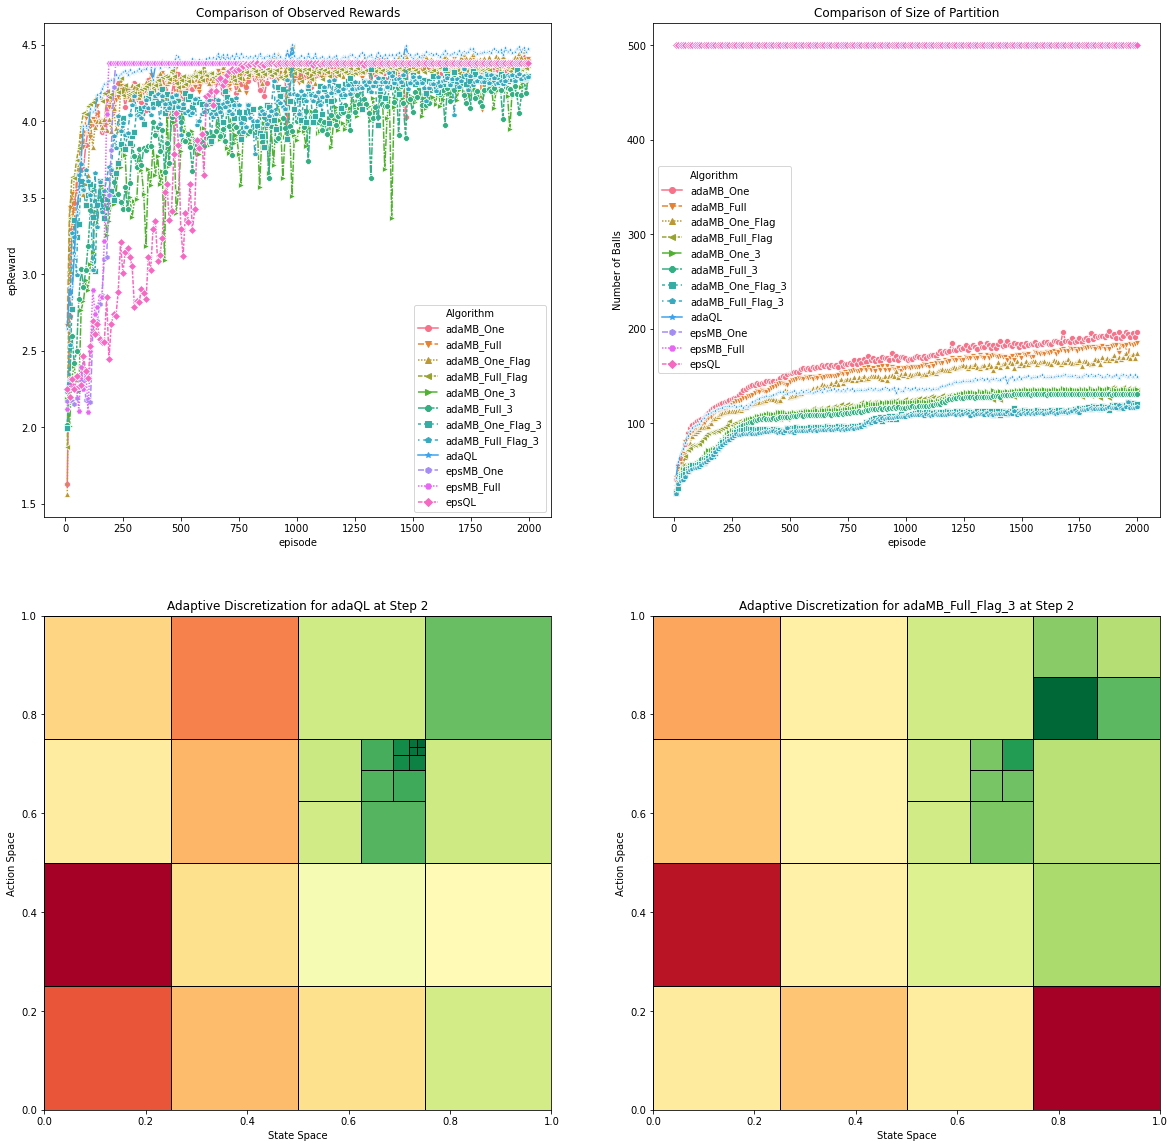

Press Enter to continue...


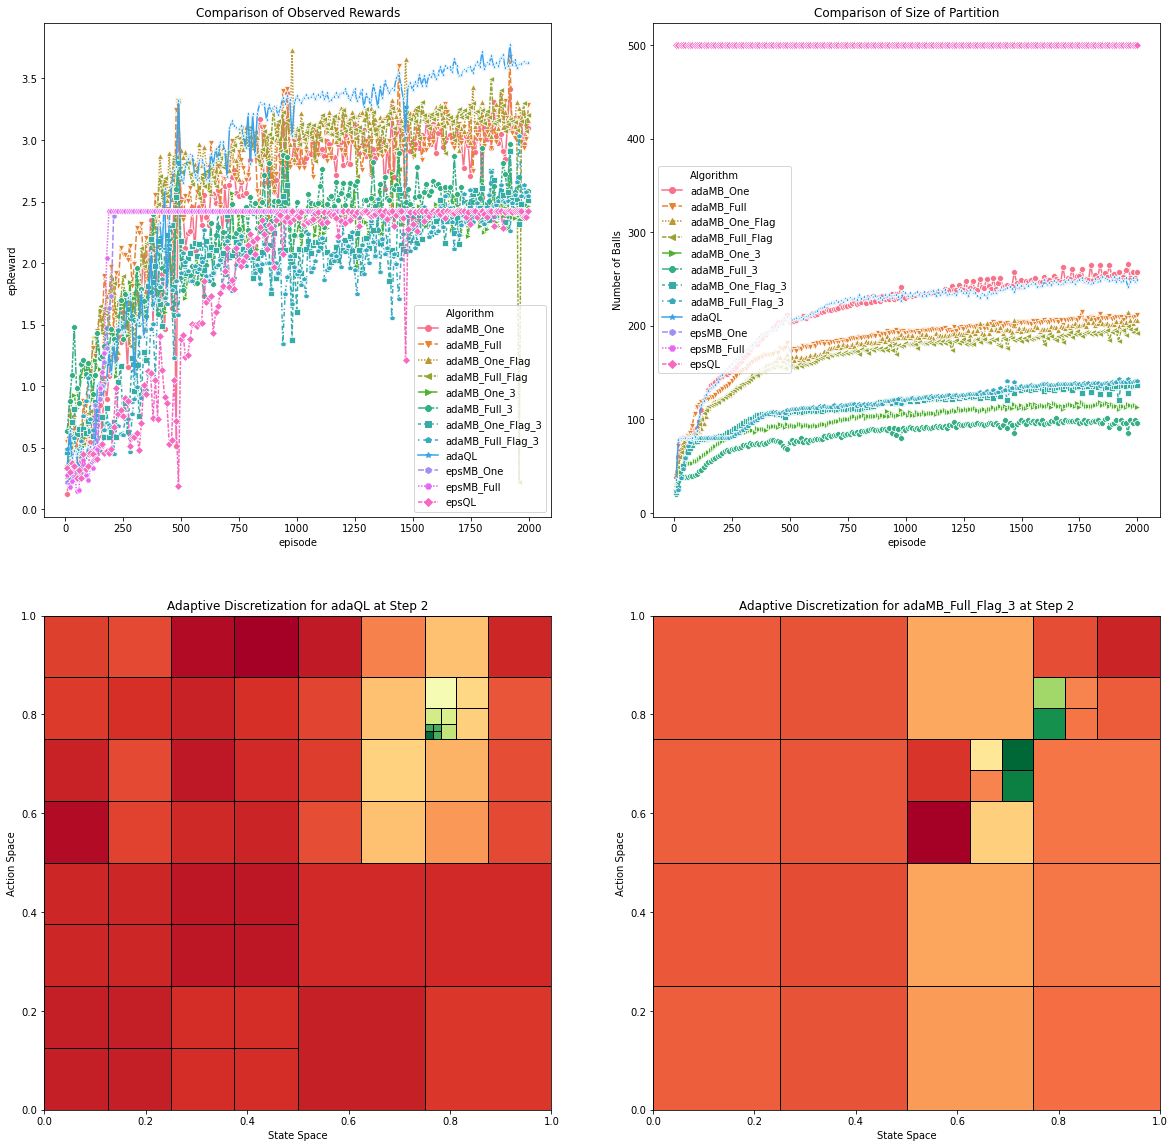

In [ ]:
for problem in problem_list:
    for typ in problem_type:
        for param in problem_param:
            path = './data/'+problem+'_'+typ+'_'+param+'_'
            fig_name = './'+problem+'_'+typ+'_'+param+'.pdf'
            
            fig = plt.figure(figsize = (20, 20))
            
            df = pd.read_csv(path + algo_list[0]+'.csv')
            df['Algorithm'] = algo_list[0]
            for algo in algo_list:
                df_data = pd.read_csv(path+algo+'.csv')
                df_data['Algorithm'] = algo
                df = pd.concat([df, df_data])
            
            
            plt.subplot(2,2,1)
            plt.xlabel('Episode')
            plt.ylabel('Observed Reward')
            plt.title('Comparison of Observed Rewards')
            sns.lineplot(data = df, hue = 'Algorithm', style = 'Algorithm', dashes = dash_styles, markers = filled_markers, x = 'episode', y = 'epReward', ci=None)
            plt.legend()

            
            plt.subplot(2,2,2)
            plt.xlabel('Episode')
            plt.ylabel('Number of Active Regions')
            plt.title('Comparison of Size of Partition')
            sns.lineplot(data = df, hue = 'Algorithm', style = 'Algorithm', dashes = dash_styles, markers = filled_markers, x = 'episode', y = 'Number of Balls', ci=None)
            plt.legend()
            
            algo_one_to_plot = 'adaQL'
            algo_two_to_plot = 'adaMB_Full_Flag_3'
            
            plt.subplot(2,2,3)
            h = 2
            name_obj = path+algo_one_to_plot+'.obj'
            infile = open(name_obj, 'rb')
            agent = pickle.load(infile)
            infile.close()
            tree = agent.tree_list[h-1]
            tree.plot_q(fig,h)
            plt.title('Adaptive Discretization for ' + algo_one_to_plot + ' at Step ' + str(h))
            
            plt.subplot(2,2,4)
            name_obj = path+algo_two_to_plot+'.obj'
            infile = open(name_obj, 'rb')
            agent = pickle.load(infile)
            infile.close()
            tree = agent.tree_list[h-1]
            tree.plot_q(fig,h)
            plt.title('Adaptive Discretization for ' + algo_two_to_plot + ' at Step ' + str(h))
            
            plt.show()
            input("Press Enter to continue...")
            